In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.layers import Dense,Activation
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\SR\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SR\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SR\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SR\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [3]:
from keras.datasets import boston_housing

In [4]:
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

57344/57026 [==============================] - 2s 32us/step


In [5]:
x_train.shape , x_test.shape

((404, 13), (102, 13))

In [7]:
model = Sequential()
model.add(Dense(100 ,input_shape = (13,)))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               1400      
_________________________________________________________________
activation_6 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)              

In [8]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [9]:
model.fit(x_train,y_train,batch_size=32,epochs=50,verbose=2,validation_data=(x_test,y_test))


Train on 404 samples, validate on 102 samples
Epoch 1/50
 - 0s - loss: 158.7566 - mse: 158.7566 - val_loss: 96.8750 - val_mse: 96.8750
Epoch 2/50
 - 0s - loss: 78.7627 - mse: 78.7627 - val_loss: 67.8337 - val_mse: 67.8337
Epoch 3/50
 - 0s - loss: 61.6964 - mse: 61.6964 - val_loss: 59.0371 - val_mse: 59.0371
Epoch 4/50
 - 0s - loss: 64.4227 - mse: 64.4227 - val_loss: 82.3205 - val_mse: 82.3205
Epoch 5/50
 - 0s - loss: 60.6231 - mse: 60.6231 - val_loss: 61.7076 - val_mse: 61.7076
Epoch 6/50
 - 0s - loss: 57.1920 - mse: 57.1920 - val_loss: 59.6530 - val_mse: 59.6530
Epoch 7/50
 - 0s - loss: 55.0058 - mse: 55.0058 - val_loss: 55.2403 - val_mse: 55.2403
Epoch 8/50
 - 0s - loss: 55.1884 - mse: 55.1884 - val_loss: 64.6657 - val_mse: 64.6657
Epoch 9/50
 - 0s - loss: 52.7629 - mse: 52.7629 - val_loss: 55.4116 - val_mse: 55.4116
Epoch 10/50
 - 0s - loss: 51.8224 - mse: 51.8225 - val_loss: 56.3711 - val_mse: 56.3711
Epoch 11/50
 - 0s - loss: 52.3962 - mse: 52.3962 - val_loss: 59.0319 - val_mse: 

In [11]:
y_pred = model.predict(x_test).flatten()

array([12.080358, 21.336096, 22.661686, 38.49195 , 24.690716, 21.848482,
       30.788338, 23.562536, 19.261894, 27.129627, 16.160477, 19.79669 ,
       20.430746, 36.751015, 27.498325, 22.372429, 23.014347, 22.955181,
       25.110489, 36.782898, 15.136941, 12.566928, 20.404121, 19.431252,
       24.405361, 31.927574, 28.796892, 44.231796, 13.85468 , 23.436117,
       23.762304, 15.379462, 32.545723, 21.87868 , 20.033863, 12.77333 ,
       17.533596, 14.942234, 30.732315, 29.524889, 27.963001, 23.691568,
       21.856174, 30.363913, 40.28196 , 23.455542, 31.882414, 20.498075,
       38.65015 , 22.331806, 41.091614, 20.6512  , 15.336181, 18.988894,
       36.14714 , 27.216099, 17.302956, 33.367264, 34.771652, 25.59252 ,
       32.863457, 24.341402, 20.039785, 21.687813, 25.19476 , 25.643124,
       24.047094, 25.883923, 17.880066, 13.899959, 35.38359 , 26.610786,
       33.02278 , 20.739155, 23.905056, 21.47948 , 23.114937, 21.820087,
       36.15664 , 13.041224, 21.1389  , 40.43824 , 

In [13]:
np.sum((y_test - y_pred)**2)/y_test.shape[0]

56.00892163587858

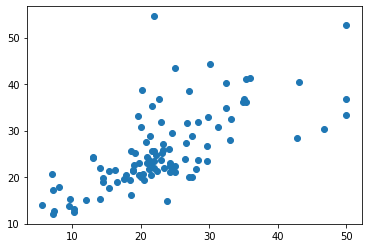

In [14]:
plt.scatter(y_test,y_pred)
plt.show()

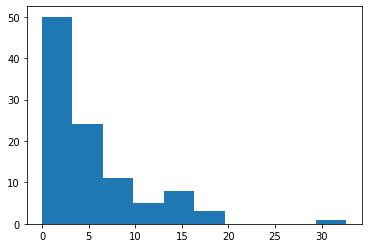

In [16]:
plt.hist(abs(y_test - y_pred))
plt.show()